In [3]:
# импортируем необходимые библиотеки и модули:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import datetime as dt
import warnings
warnings.filterwarnings('ignore')  # Избавиться от предупреждения о том что функция в будущем будет изменена.

In [2]:
#1.1. Импорт табличных данных в окружение Jupyter Notebook.
df1 = pd.read_excel('ABTest_DA_dataset.xlsx',sheet_name='Данные')
df1.head()
# ab = pd.read_csv('исходник'.csv',sep=';', parse_dates = ['time_came'])   #Исправить формат даты столбца на нормальный срузу, чтобы потом транковать.

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468


In [4]:
df2 = pd.read_excel('ABTest_DA_dataset.xlsx',sheet_name='Clients')
df2.head()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [5]:
df3 = pd.read_excel('ABTest_DA_dataset.xlsx',sheet_name='Region_dict')
df3.head()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [6]:
#1.2. Изучение 3х таблиц и проверка их на наличие пустых значений.
df1.info()
# df1.head() 
# df1.shape
# df1.describe(include = 'all') 
print('Нуллов в столбце id_order:', len(df1.loc[df1['id_order'].isnull()]) )  
print('Нуллов в столбце id_client:', len(df1.loc[df1['id_client'].isnull()]) )  
print('Нуллов в столбце amt_payment:', len(df1.loc[df1['amt_payment'].isnull()]) )  
print('Нуллов в столбце dtime_pay:', len(df1.loc[df1['dtime_pay'].isnull()]) ) 
print('Число уникальных в таблице df1:')
df1.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     37989 non-null  int64         
 1   id_client    37401 non-null  float64       
 2   amt_payment  35845 non-null  float64       
 3   dtime_pay    35560 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.2 MB
Нуллов в столбце id_order: 0
Нуллов в столбце id_client: 588
Нуллов в столбце amt_payment: 2144
Нуллов в столбце dtime_pay: 2429
Число уникальных в таблице df1:


id_order       37989
id_client      29712
amt_payment     6190
dtime_pay      35560
dtype: int64

In [7]:
df2.info()
# df2.head()
# df2.shape
# df2.describe(include = 'all')
print('Нуллов в столбце id_client:', len(df2.loc[df2['id_client'].isnull()]) )  
print('Нуллов в столбце dtime_ad :', len(df2.loc[df2['dtime_ad'].isnull()]) )  
print('Нуллов в столбце nflag_test:', len(df2.loc[df2['nflag_test'].isnull()]) )  
print('Нуллов в столбце id_trading_point:', len(df2.loc[df2['id_trading_point'].isnull()]) ) 
print('Число уникальных в таблице df2:')
df2.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB
Нуллов в столбце id_client: 0
Нуллов в столбце dtime_ad : 249
Нуллов в столбце nflag_test: 0
Нуллов в столбце id_trading_point: 0
Число уникальных в таблице df2:


id_client           55605
dtime_ad            55356
nflag_test              2
id_trading_point       66
dtype: int64

In [8]:
df3.info()
# df3.head()
# df3.shape
# df3.describe(include = 'all')
print('Нуллов в столбце id_trading_point:', len(df3.loc[df3['id_trading_point'].isnull()]) ) 
print('Нуллов в столбце city:', len(df3.loc[df3['city'].isnull()]) )  
print('Число уникальных в таблице df3:')
df3.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
Нуллов в столбце id_trading_point: 0
Нуллов в столбце city: 0
Число уникальных в таблице df3:


id_trading_point    66
city                23
dtype: int64

In [9]:
#1.3. таб.1 (данные о покупках). Исключение из таблиц всех строк, в которых есть нулловые значения. Подумать об альтерн.действиях - замене нуллов ну нули или на другие значения.
print('Обоснование Исключения/замены Нуллов. Таб.df1 (данные о покупках) - Действия с Нуллами в следующих столбцах:')
print('1) id_client - Исключаю строки, т.к. это полностью отсутствующие операции.')
print('2) amt_payment - Заменить на 0, клиенту могло быть показано объявление, но он не совершил покупку, это релевантный но отрицательный результат.')
print('3) dtime_pay - Нет даты покупки при НЕ НУЛЛЕ в графе сумма покупки - Удаляем, т.к. неизвестная дата (воможно нерелевантная - до эксперимента).')

df10=df1[~df1['id_client'].isnull()] # Исключаю строки без клиента, т.к. это полностью отсутствующие операции. 
mask = (df10['amt_payment'].isnull()) & (df10['dtime_pay'].isnull()) 
df10.loc[mask, ['amt_payment']]=0 # Нуллы в колонке amt_payment - заменить на 0, клиенту могло быть показано объявление, но он не совершил покупку. 
df10.loc[mask, ['dtime_pay']]=df10['dtime_pay'].max() # Для таких покупок (на сумму 0) добавляем искуственно дату из релевантного периода (самую позднюю дату покупки). 
df10 = df10.dropna() #drop all rows that have any NaN values - окончательно чистим оставшиеся 285 нуллов (остались только в солбце дата), это покупки с неизвестной датой, возможно до эксперимента. 
df10 = df10.reset_index(drop=True) #reset index of DataFrame

print('Всего строк в 1ой таблице df1 (стала df10) из исходных 37989 осталось:', len(df10) )
print('Нуллов в столбце id_order:', len(df10.loc[df10['id_order'].isnull()]) )
print('Нуллов в столбце id_client:', len(df10.loc[df10['id_client'].isnull()]) )
print('Нуллов в столбце amt_payment:', len(df10.loc[df10['amt_payment'].isnull()]) )
print('Нуллов в столбце dtime_pay:', len(df10.loc[df10['dtime_pay'].isnull()]) ) 
# df10.sort_values('dtime_pay', ascending = False)

Обоснование Исключения/замены Нуллов. Таб.df1 (данные о покупках) - Действия с Нуллами в следующих столбцах:
1) id_client - Исключаю строки, т.к. это полностью отсутствующие операции.
2) amt_payment - Заменить на 0, клиенту могло быть показано объявление, но он не совершил покупку, это релевантный но отрицательный результат.
3) dtime_pay - Нет даты покупки при НЕ НУЛЛЕ в графе сумма покупки - Удаляем, т.к. неизвестная дата (воможно нерелевантная - до эксперимента).
Всего строк в 1ой таблице df1 (стала df10) из исходных 37989 осталось: 37116
Нуллов в столбце id_order: 0
Нуллов в столбце id_client: 0
Нуллов в столбце amt_payment: 0
Нуллов в столбце dtime_pay: 0


In [10]:
#1.3 таб. 2 (клиенты, посмотревшие рекламу). Исключение строк, в которых есть нулловые значения. 
print('Обоснование Исключения/замены Нуллов. Таб.df2 (клиенты, посмотревшие рекламу) - Действия с Нуллами в следующих столбцах:')
print('1) dtime_ad - Исключаю строки 249шт, т.к. это клиенты, которым не показано объявление.')
df20 = df2.dropna() #drop all rows that have any NaN values -Нуллы в колонке dtime_ad - Исключаю такие строки, это клиенты, которым не показано объявление.
dа20 = df2.reset_index(drop=True) #reset index of DataFrame
print('Всего строк во 2ой таблице df2 (стала df20) из исходных 55605 осталось:', len(df20) )  
print('Нуллов в столбце id_client:', len(df20.loc[df20['id_client'].isnull()]) )  
print('Нуллов в столбце dtime_ad :', len(df20.loc[df20['dtime_ad'].isnull()]) )  
print('Нуллов в столбце nflag_test:', len(df20.loc[df20['nflag_test'].isnull()]) )  
print('Нуллов в столбце id_trading_point:', len(df20.loc[df20['id_trading_point'].isnull()]) ) 
# df20.sort_values('dtime_ad', ascending = False)

Обоснование Исключения/замены Нуллов. Таб.df2 (клиенты, посмотревшие рекламу) - Действия с Нуллами в следующих столбцах:
1) dtime_ad - Исключаю строки 249шт, т.к. это клиенты, которым не показано объявление.
Всего строк во 2ой таблице df2 (стала df20) из исходных 55605 осталось: 55356
Нуллов в столбце id_client: 0
Нуллов в столбце dtime_ad : 0
Нуллов в столбце nflag_test: 0
Нуллов в столбце id_trading_point: 0


In [11]:
## *Проверяю наличие платежей с нерелевантным временем (платежи раньше, чем клиент увидел рекламу):
df11 = df10.merge(df20, how = 'left', left_on=['id_client'], right_on=['id_client'])
df11['flag_wrong_time'] = np.where(df11['dtime_ad']> df11['dtime_pay']   , 1, 0)
df11.sort_values('flag_wrong_time', ascending = False) 
print('В 1ой таблице df10 (df11) платежей с нерелевантным временем (платежи раньше, чем клиент увидел рекламу) всего шт.:', df11['flag_wrong_time'].sum() )
print('=> Значит далее можно суммировать все платежи клиента.')

В 1ой таблице df10 (df11) платежей с нерелевантным временем (платежи раньше, чем клиент увидел рекламу) всего шт.: 0
=> Значит далее можно суммировать все платежи клиента.


In [12]:
# *Проверка. Right Join - список клиентов из правой и всех их платежей(не суммы, а каждый платеж). Проставить нули не платившим. Средний платеж считать по этой табл.
df12=df10.merge(df20, how = 'right', left_on=['id_client'], right_on=['id_client'])
df12.info()
# df12.nunique()
len(df12[df12['amt_payment'].isnull()])
df12.sort_values('dtime_ad', ascending = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62982 entries, 0 to 62981
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          37076 non-null  float64       
 1   id_client         62982 non-null  float64       
 2   amt_payment       37076 non-null  float64       
 3   dtime_pay         37076 non-null  datetime64[ns]
 4   dtime_ad          62982 non-null  datetime64[ns]
 5   nflag_test        62982 non-null  int64         
 6   id_trading_point  62982 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 3.4 MB


,id_order,id_client,amt_payment,dtime_pay,dtime_ad,nflag_test,id_trading_point
8420,NaN,233940.0,NaN,NaT,2022-08-29 00:02:17.878,1,88
10561,NaN,261072.0,NaN,NaT,2022-08-28 23:52:15.137,1,453
33480,NaN,300853.0,NaN,NaT,2022-08-28 23:46:58.090,1,11
39420,NaN,245802.0,NaN,NaT,2022-08-28 23:38:02.721,0,3987
34342,NaN,295605.0,NaN,NaT,2022-08-28 23:23:13.423,1,1654
...,...,...,...,...,...,...,...
53379,295646.0,178564.0,0.0,2022-12-28 22:57:20.608,2022-06-03 02:53:10.089,1,26
53378,264934.0,178564.0,0.0,2022-12-28 22:57:20.608,2022-06-03 02:53:10.089,1,26
44353,121122.0,178563.0,768.0,2022-10-09 03:59:15.396,2022-06-03 02:52:10.616,1,112
40928,169709.0,178562.0,2439.0,2022-06-17 00:06:30.469,2022-06-03 02:51:21.878,0,2652


In [13]:
# * Проверка. Список нерелевантных клиентов для исключения - Не получали рекламу. Не обнаружено.
df12_gr=df12.groupby(['id_client']).agg(cnt_ad=('dtime_ad','count'),cnt_flagtest=('nflag_test','count'),cnt_pay=('dtime_pay','count')).reset_index().sort_values('cnt_ad', ascending = True) 
df12_gr
clients_no_ad=df12_gr[df12_gr['cnt_ad']==0]['id_client'] 
clients_no_ad  

Series([], Name: id_client, dtype: float64)

In [14]:
#1.4. Исследую количество торговых точек в каждом городе - строю группировку по количеству в каждом городе и визуализирую с помощью гистограммы.
df3_gr=df3.groupby(['city']).agg(cnt_t_points = ('id_trading_point', 'count')).reset_index()
df3_gr.sort_values('cnt_t_points', ascending = False) #Сгруппировал количеству торговых точек в каждом городе.

,city,cnt_t_points
15,Санкт-Петербург,11
7,Москва,11
4,Казань,6
10,Новосибирск,6
6,Красноярск,5
5,Краснодар,4
14,Самара,4
8,Мурманск,2
18,Сочи,2
16,Саратов,2


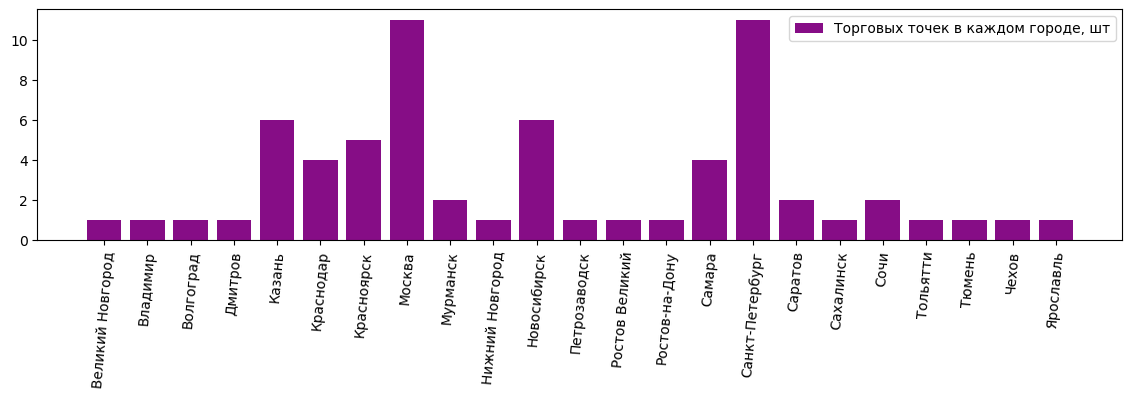

In [15]:
plt.rcParams["figure.figsize"] = (14,3)
fig,ax=plt.subplots()
ax.bar(df3_gr['city'],df3_gr['cnt_t_points'], alpha = .95, color = 'purple', label = 'Торговых точек в каждом городе, шт')
ax.legend(loc='best')

for tick in ax.get_xticklabels():  # Rotating X-axis labels. 
    tick.set_rotation(85)     # Либо так: Вертикально надписи осей - добавить строчку plt.xticks(rotation = 90)
plt.show()

In [16]:
#  2.1. У одного клиента может быть несколько платежей. Строим агрегацию таблицы с платежами, где вычислим сумму платежей на каждого клиента.
df1_gr=df10.groupby(['id_client']).agg(sum_payments = ('amt_payment', 'sum'), cnt_payments = ('amt_payment', 'count')).reset_index()
print('Всего строк в 1ой таблице (df10) из 37116 неоднократно плативших клиентов осталось уникальных плативших клиентов:', len(df1_gr) )
print(df1_gr['cnt_payments'].count())
print(df1_gr['cnt_payments'].sum())
df1_gr.sort_values('cnt_payments', ascending = False) #Сгруппировал по клиентам и их сумме платежей.

Всего строк в 1ой таблице (df10) из 37116 неоднократно плативших клиентов осталось уникальных плативших клиентов: 29485
29485
37116


,id_client,sum_payments,cnt_payments
2415,181099.0,33512.0,11
1710,180362.0,38664.0,10
15433,194825.0,36645.0,10
28593,208695.0,35363.0,10
23453,203282.0,42222.0,10
...,...,...,...
10956,190118.0,1014.0,1
10954,190116.0,3976.0,1
10953,190115.0,4135.0,1
10952,190114.0,4203.0,1


In [17]:
# 2.2. Соединим (по клиенту) сгруппированную таблицу с платежами с клиентской таблицей. Убедившись, что в таблице остались все клиенты из клиентской таблицы.
df21 = df20.merge(df1_gr, how = 'left', left_on=['id_client'], right_on=['id_client'])
# df21.info()
print('Всего строк в клиентской таблице df20 (теперь df21) было 55356, после джойна сумм платежей клиентов осталось:', len(df21) )  
df21.sort_values('sum_payments', ascending = True)

Всего строк в клиентской таблице df20 (теперь df21) было 55356, после джойна сумм платежей клиентов осталось: 55356


,id_client,dtime_ad,nflag_test,id_trading_point,sum_payments,cnt_payments
27584,185984,2022-06-21 11:45:01.781,1,26,0.0,1.0
3249,192048,2022-07-06 14:06:59.066,0,212,0.0,1.0
54212,184364,2022-06-17 12:11:32.654,1,26,0.0,1.0
54215,185775,2022-06-20 23:43:05.116,1,213,0.0,1.0
36033,208339,2022-08-16 09:49:51.695,1,46,0.0,2.0
...,...,...,...,...,...,...
55347,331831,2022-07-01 04:28:28.282,0,55,NaN,NaN
55348,211355,2022-08-03 02:00:09.287,0,82,NaN,NaN
55349,260405,2022-08-15 02:47:58.960,0,576,NaN,NaN
55352,244069,2022-08-08 00:12:31.319,1,991,NaN,NaN


In [18]:
# 2.3. Заполним нулями суммы покупок тех клиентов, которые их не совершали
print(len(df21[df21['cnt_payments'].isnull()]),'- Число не совершавших покупки клиентов -', len(df21[df21['sum_payments'].isnull()]))
mask1 = df21['sum_payments'].isnull()
mask2 = df21['cnt_payments'].isnull()
df21.loc[mask1, ['sum_payments']]=0 #Заполняю нулями сумму покупки (0 руб). Либо Для заполнения нулями можно метод fillna(0) к нужной pd.Series .
df21.loc[mask2, ['cnt_payments']]=0 #Заполняю нулями количество покупок (0 шт.)
df21.sort_values('sum_payments', ascending = True)

25906 - Число не совершавших покупки клиентов - 25906


,id_client,dtime_ad,nflag_test,id_trading_point,sum_payments,cnt_payments
55355,317377,2022-08-12 15:43:54.538,1,477,0.0,0.0
22879,215059,2022-06-17 20:02:36.251,0,1015,0.0,0.0
44102,216034,2022-08-17 15:14:51.738,1,2212,0.0,0.0
22876,210807,2022-06-08 13:22:28.542,0,2652,0.0,0.0
22875,316132,2022-08-12 04:36:59.124,1,309,0.0,0.0
...,...,...,...,...,...,...
21124,192062,2022-07-06 14:56:58.319,0,699,36310.0,9.0
7635,194825,2022-07-13 13:46:19.072,0,516,36645.0,10.0
27278,180362,2022-06-07 14:23:04.234,0,544,38664.0,10.0
28128,203282,2022-08-03 18:06:06.065,1,516,42222.0,10.0


In [19]:
# 2.4. С помощью словаря регионов подтягиваем к каждой торговой точке город, в котором она находится.
df22 = df21.merge(df3, how = 'left', left_on=['id_trading_point'], right_on=['id_trading_point'])
df22
# df22.info()

,id_client,dtime_ad,nflag_test,id_trading_point,sum_payments,cnt_payments,city
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,1.0,Красноярск
1,226069,2022-07-11 16:28:38.511,1,54,0.0,0.0,Мурманск
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,2.0,Казань
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,0.0,Краснодар
4,254313,2022-06-19 22:18:01.770,1,453,0.0,0.0,Санкт-Петербург
...,...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,2.0,Краснодар
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,0.0,Казань
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,3.0,Казань
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,3.0,Санкт-Петербург


In [20]:
# 2.5. Создаю поле флаг платежа, который принимает значения 0 или 1 в зависимости от того, заплатил клиент или нет.
df22['flag_pay'] = np.where(df22['sum_payments']>0, 1, 0)
df22

,id_client,dtime_ad,nflag_test,id_trading_point,sum_payments,cnt_payments,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,1.0,Красноярск,1
1,226069,2022-07-11 16:28:38.511,1,54,0.0,0.0,Мурманск,0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,2.0,Казань,1
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,0.0,Краснодар,0
4,254313,2022-06-19 22:18:01.770,1,453,0.0,0.0,Санкт-Петербург,0
...,...,...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,2.0,Краснодар,1
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,0.0,Казань,0
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,3.0,Казань,1
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,3.0,Санкт-Петербург,1


In [21]:
# 3.1. Создаю функцию test_calc, которая будет вычислять значение t-критерия (критерия Стьюдента) и p_value для сравнения средних 
# и с помощью функции print выводить сообщение о том, существует ли разница между средними (на основании p_value).
# Аргументы функции: r1 (первая выборка), r2 (вторая выборка), alpha (уровень значимости - имеет значение по умолчанию 5%).
def test_calc(r1, r2,alpha = .05):
    s, p = ttest_ind(r1, r2)
    print("Среднее первого ряда = ", r1.mean())
    print("Среднее второго ряда = ", r2.mean())
    print("Рост среднего 2го ряда по отношению к 1ому = ", round(r2.mean()/r1.mean(),3))
    print('TTest:')
    print("Значение t-критерия = ",s.round(4))
    print("Значение p_value = ",p)
    if p > alpha:
        print('Ряды статистически равны')
    else:
        print('Ряды статистически не равны')
    return s,p
## ttest интерпретация. Двухвыборочный t-критерий.
# если s - t-критерий - по модулю менее 1.96 (1.64) средние 2х выборок равны (ГИПОТЕЗА H0). Больше +1.96 -1ый ряд среднее больше.
# p - p value - если получим больше 5%, средние 2х выборок равны.


In [22]:
# 3.2. Создаю функцию mann_whitney_func, которая будет рассчитывать значение критерия Манна Уитни и p_value для сравнения распределений 
# и с помощью функции print выводить сообщение о том, существует ли разница между средними (на основании p_value).
# Аргументы функции: r1 (первая выборка), r2 (вторая выборка), alpha (уровень значимости - имеет значение по умолчанию 5%).
#**Критерий Манна-Уитни: Маленькое p_value близко к нуль <0,05 означает, что “распределения не равны”. mw_stat - технический показатель, не смотрим.
def mann_whitney_func(r1,r2,alpha=0.05):
    from scipy.stats import mannwhitneyu
    mw_stat, p_value = mannwhitneyu(r1,r2)
    print("Среднее первого ряда = ", r1.mean())
    print("Среднее второго ряда = ", r2.mean())
    print("Рост среднего 2го ряда по отношению к 1ому = ", round(r2.mean()/r1.mean(),3))
    print('Тест Манна-Уитни:')
    print("Значение критерия Манна Уитни = ",mw_stat.round(4)," (технический показатель, не смотрим)")
    print("Значение p_value = ",p_value)
    if p_value < alpha: 
        print('=> Распределения статистически не равны.' ) 
    else:
        print('=> Распределения статистически равны.' )      
    return mw_stat, p_value
# проверяем функцию на нужных рядах: mann_whitney_func(Physics_Blood['PHYSICS'], Physics_Blood2['BloodB']) 

In [23]:
# 4.1. Создаем пустой список. Запускаем цикл по всем торговым точкам и добавляем к этому списку все торговые точки, 
# в которых не было заплачено ни одного рубля ни одним клиентом.
points_zero = []
for i in df22['id_trading_point'].unique():    
    sum_all = df22[(df22['id_trading_point']==i) ]['sum_payments'].sum()
    if (sum_all == 0) :
        points_zero.append(i)
points_zero

[26, 7, 23, 4, 1, 13]

In [24]:
# 4.2/0. Создаем еще один пустой список. Запускаем цикл по всем торговым точкам и добавим к этому списку все торговые точки, 
# в которых пустует или контрольная, или тестовая группа.
points_no0 = []
for i in df22['id_trading_point'].unique():    
    sum_control = df22[(df22['id_trading_point']==i) & (df22['nflag_test']==0)]['sum_payments'].sum()
    if (sum_control == 0):
        points_no0.append(i)
points_no0

[739, 228, 26, 603, 7, 23, 4, 1, 13]

In [25]:
# 4.2/1.
points_no1 = []
for i in df22['id_trading_point'].unique():    
    sum_test = df22[(df22['id_trading_point']==i) & (df22['nflag_test']==1)]['sum_payments'].sum()
    if (sum_test == 0):
        points_no1.append(i)
points_no1

[1015, 866, 1099, 46, 26, 810, 800, 7, 23, 4, 1, 13]

In [331]:
#Второй вариант решения через группировку (основной - через цикл for).
# # 4.1. Создать пустой список. Запустить цикл по всем торговым точкам и добавить к этому списку все торговые точки, 
# # в которых не было заплачено ни одного рубля ни одним клиентом.
# ## Решаю через группировку, Группируем по Точкам:
# df22_gr1=df22.groupby(['id_trading_point']).agg(sum_per_point=('sum_payments','sum')).reset_index().sort_values('sum_per_point', ascending = True) 
# df22_gr1
# # Ищем что просят исключить (точки без платежей):
# points_zero=df22_gr1[df22_gr1['sum_per_point']==0]['id_trading_point']
# points_zero # Точки, в которых не было заплачено ни одного рубля ни одним клиентом
# # points_nozero=clients1_gr1[clients1_gr1['sum_per_point']!=0].sort_values('sum_per_point', ascending = True)
# # points_nozero['id_trading_point'] # Исключены Точки, в которых не было заплачено ни одного рубля ни одним клиентом

0     1
2     4
3     7
5    13
8    26
7    23
Name: id_trading_point, dtype: int64

In [442]:
# # 4.2. Создать еще один пустой список. Запустить цикл по всем торговым точкам и добавить к этому списку все торговые точки, 
# # в которых пустует или контрольная, или тестовая группа.
# #Решаю через группировку. Группируем по Точкам. Ищем что просят исключить:
# df22_gr2=df22.groupby(['id_trading_point']).agg(mean_flag=('nflag_test','mean')).reset_index().sort_values('mean_flag', ascending = True)
# df22_gr2         #Где средний флаг ровно 0 = только группа 0, ровно 1 - только тестовая группа. Нужны, где представлены обе группы.   ~
# points_only1group=df22_gr2[df22_gr2['mean_flag']==1]['id_trading_point']
# points_only0group=df22_gr2[df22_gr2['mean_flag']==0]['id_trading_point']
# print(points_only0group)
# print(points_only1group)
# # (!) Ярославль (точка46) оказался пропущен. А циклом - все нормально, нашелся.

44     800
46     810
53    1099
52    1015
47     866
Name: id_trading_point, dtype: int64
41    603
28    228
43    739
Name: id_trading_point, dtype: int64


In [445]:
# # * Вариант, где отсекаем всё сразу (и 4.1 и 4.2)
# zero_pay_points = []
# for i in df22['id_trading_point'].unique():    
#     sum_control = df22[(df22['id_trading_point']==i) & (df22['nflag_test']==0)]['sum_payments'].sum()
#     sum_test = df22[(df22['id_trading_point']==i) & (df22['nflag_test']==1)]['sum_payments'].sum()
#     if (sum_control == 0) | (sum_test == 0):
#         zero_pay_points.append(i)
# zero_pay_points   

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]

In [26]:
#5.1. Отбросим все торговые точки, которые были вами обнаружены в пункте 4:
df23 = df22[(~df22['id_trading_point'].isin(points_no0))&(~df22['id_trading_point'].isin(points_no1))&(~df22['id_trading_point'].isin(points_zero))]
# должно работать и так через + :  .isin(points_no0 + points_no1 + points_zero)
print('Всего строк после исключения (фильтр согласно п.4) в клиентской таблице (было df22 стало df23) из 55356 строк осталось:', len(df23) )  

df23['avg_payment_ofclient']=df23['sum_payments']/df23['cnt_payments'] #Средний платеж клиента (число его платежей/количество) - добавляем столбец.
mask3 = df23['avg_payment_ofclient'].isnull() #Заполним нулями средний платёж тех клиентов, которые их не совершали.
df23.loc[mask3, ['avg_payment_ofclient']]=0
# print(df23.sort_values('cnt_payments', ascending = False))
df23

Всего строк после исключения (фильтр согласно п.4) в клиентской таблице (было df22 стало df23) из 55356 строк осталось: 45318


,id_client,dtime_ad,nflag_test,id_trading_point,sum_payments,cnt_payments,city,flag_pay,avg_payment_ofclient
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,1.0,Красноярск,1,5349.000000
1,226069,2022-07-11 16:28:38.511,1,54,0.0,0.0,Мурманск,0,0.000000
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,2.0,Казань,1,3161.000000
4,254313,2022-06-19 22:18:01.770,1,453,0.0,0.0,Санкт-Петербург,0,0.000000
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0,1.0,Москва,1,4021.000000
...,...,...,...,...,...,...,...,...,...
55350,188702,2022-06-28 06:16:25.664,0,453,1323.0,1.0,Санкт-Петербург,1,1323.000000
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,0.0,Казань,0,0.000000
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,3.0,Казань,1,2382.000000
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,3.0,Санкт-Петербург,1,4573.333333


Суммарные платежи каждого клиента по группам 0 и 1. 
Для наглядности обрезана сумма платежей клиента (оставил выше 0 и <15000): 
*Ноль - слишком большое количество; от 15 до 40тыс - длинный и низкий хвост 
**Для нулевых платежей группа контроль чуть выше, чем группа тест: 11,7тыс.наблюдений против 10,7тыс. 


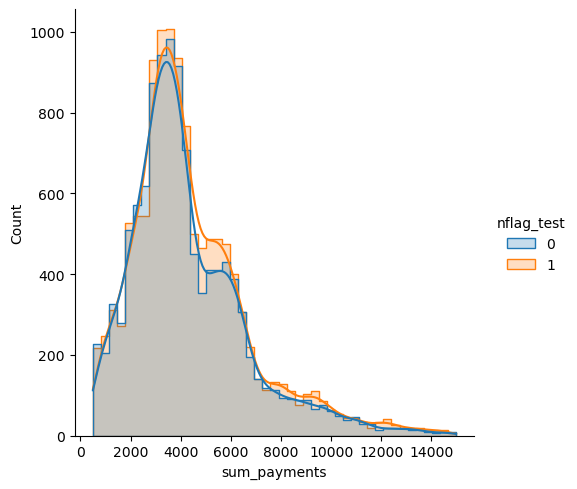

In [27]:
#5.2. Изобразим гистограмму платежей, на которой различными цветами изображены группы “тест” и “контроль”.
clients1_15000=df23 [(df23['sum_payments']>0)&(df23['sum_payments']<15000)] #Для наглядности обрезаны платежи клиента (>0 и <15000)
print('Суммарные платежи каждого клиента по группам 0 и 1. ')
print('Для наглядности обрезана сумма платежей клиента (оставил выше 0 и <15000): ')
print('*Ноль - слишком большое количество; от 15 до 40тыс - длинный и низкий хвост ')
print('**Для нулевых платежей группа контроль чуть выше, чем группа тест: 11,7тыс.наблюдений против 10,7тыс. ')
sns.displot(clients1_15000, x="sum_payments", hue="nflag_test", element="step",kde = True, bins = 45)
plt.show()

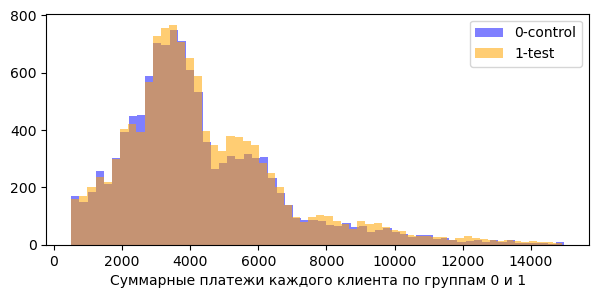

In [28]:
#То же самое. Проверка на другом графике.
plt.rcParams["figure.figsize"] = (3,6)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
ax1.hist(df23[(df23['nflag_test']==0)&(df23['sum_payments']>0)&(df23['sum_payments']<15000)]['sum_payments'], bins=60, color = 'b', alpha = .50, label = '0-control') 
ax1.hist(df23[(df23['nflag_test']==1)&(df23['sum_payments']>0)&(df23['sum_payments']<15000)]['sum_payments'], bins=60, color = 'orange', alpha = .55,  label = '1-test') 
ax1.legend(loc='upper right')
ax1.set_xlabel("Суммарные платежи каждого клиента по группам 0 и 1")
plt.show() # 

Средние платежи клиентов по группам 0 и 1. 


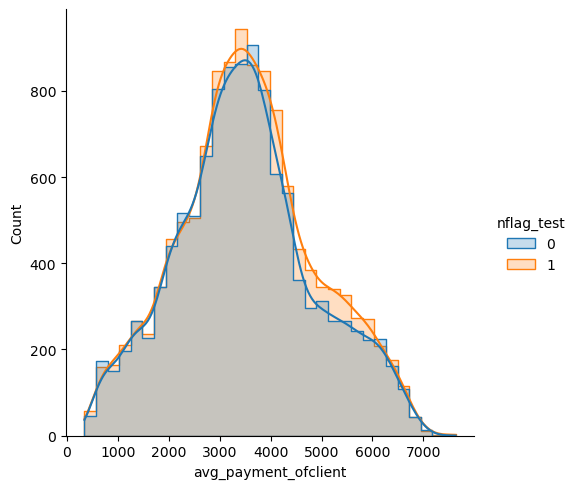

In [29]:
print('Средние платежи клиентов по группам 0 и 1. ')
clients1_20=df23 [(df23['avg_payment_ofclient']>0)&(df23['avg_payment_ofclient']<20000)] #Для наглядности обрезаны нулевые платежи клиента
sns.displot(clients1_20, x="avg_payment_ofclient", hue="nflag_test", element="step", kde = True, bins = 32)
plt.show()

In [30]:
#5.3. Применим функцию test_calc и сделаем вывод (сравниваем средние платежи)
print('TTest  - сравниваем группы 0 и 1 по сумме платежей каждого клиента:')
test_calc(df23[df23['nflag_test']==0]['sum_payments'],df23[df23['nflag_test']==1]['sum_payments'])
print('Вывод: Прирост 12%. По P-value подтверждено.')

TTest  - сравниваем группы 0 и 1 по сумме платежей каждого клиента:
Среднее первого ряда =  2189.1884317754557
Среднее второго ряда =  2452.2773446201827
Рост среднего 2го ряда по отношению к 1ому =  1.12
TTest:
Значение t-критерия =  -9.4568
Значение p_value =  3.3214645838934018e-21
Ряды статистически не равны
Вывод: Прирост 12%. По P-value подтверждено.


In [31]:
print('TTest - сравниваем группы 0 и 1 по среднему платежу каждого клиента:')
test_calc(df23[df23['nflag_test']==0]['avg_payment_ofclient'],df23[df23['nflag_test']==1]['avg_payment_ofclient'])
print('Вывод: Прирост 10,5%. По P-value подтверждено.')

TTest - сравниваем группы 0 и 1 по среднему платежу каждого клиента:
Среднее первого ряда =  1751.3508901810483
Среднее второго ряда =  1935.0535808439229
Рост среднего 2го ряда по отношению к 1ому =  1.105
TTest:
Значение t-критерия =  -9.6947
Значение p_value =  3.337433507009684e-22
Ряды статистически не равны
Вывод: Прирост 10,5%. По P-value подтверждено.


In [32]:
#5.4. Применим функцию test_calc и сделаем вывод 
#(сравниваем конверсию в платеж, то есть r1 и r2 - это ряды нулей и единиц, в зависимости от того, оплатил ли что-то клиент или нет).
print('TTest - сравниваем группы 0 и 1 по конверсии в платеж каждого клиента:')
test_calc(df23[df23['nflag_test']==0]['flag_pay'],df23[df23['nflag_test']==1]['flag_pay'])
print('Вывод: Прирост 8,7%. По P-value подтверждено.')

TTest - сравниваем группы 0 и 1 по конверсии в платеж каждого клиента:
Среднее первого ряда =  0.49975954181786386
Среднее второго ряда =  0.5432835820895522
Рост среднего 2го ряда по отношению к 1ому =  1.087
TTest:
Значение t-критерия =  -9.282
Значение p_value =  1.7338073027564523e-20
Ряды статистически не равны
Вывод: Прирост 8,7%. По P-value подтверждено.


In [33]:
#5.5. Применим функцию mann_whitney_func и сделаем вывод.
print('Mann Whitney Test - сравниваем группы 0 и 1 по сумме платежей каждого клиента:')
mann_whitney_func(df23[df23['nflag_test']==0]['sum_payments'],df23[df23['nflag_test']==1]['sum_payments'])
print('Вывод: Прирост 12%. По P-value подтверждено.')

Mann Whitney Test - сравниваем группы 0 и 1 по сумме платежей каждого клиента:
Среднее первого ряда =  2189.1884317754557
Среднее второго ряда =  2452.2773446201827
Рост среднего 2го ряда по отношению к 1ому =  1.12
Тест Манна-Уитни:
Значение критерия Манна Уитни =  243344369.0  (технический показатель, не смотрим)
Значение p_value =  3.008345273971901e-24
=> Распределения статистически не равны.
Вывод: Прирост 12%. По P-value подтверждено.


In [34]:
print('Mann Whitney Test - сравниваем группы 0 и 1 по среднему платежу каждого клиента:')
mann_whitney_func(df23[df23['nflag_test']==0]['avg_payment_ofclient'],df23[df23['nflag_test']==1]['avg_payment_ofclient'])
print('Вывод: Прирост 10,5%%. По P-value подтверждено.')

Mann Whitney Test - сравниваем группы 0 и 1 по среднему платежу каждого клиента:
Среднее первого ряда =  1751.3508901810483
Среднее второго ряда =  1935.0535808439229
Рост среднего 2го ряда по отношению к 1ому =  1.105
Тест Манна-Уитни:
Значение критерия Манна Уитни =  243649023.5  (технический показатель, не смотрим)
Значение p_value =  3.159295913524574e-23
=> Распределения статистически не равны.
Вывод: Прирост 10,5%%. По P-value подтверждено.


In [35]:
print('Mann Whitney Test - сравниваем группы 0 и 1 по конверсии в платеж каждого клиента:')
mann_whitney_func(df23[df23['nflag_test']==0]['flag_pay'],df23[df23['nflag_test']==1]['flag_pay'])
print('Вывод: Прирост 8,7%. По P-value подтверждено.')

Mann Whitney Test - сравниваем группы 0 и 1 по конверсии в платеж каждого клиента:
Среднее первого ряда =  0.49975954181786386
Среднее второго ряда =  0.5432835820895522
Рост среднего 2го ряда по отношению к 1ому =  1.087
Тест Манна-Уитни:
Значение критерия Манна Уитни =  245519959.0  (технический показатель, не смотрим)
Значение p_value =  1.8043406994299902e-20
=> Распределения статистически не равны.
Вывод: Прирост 8,7%. По P-value подтверждено.


In [36]:
print('Вывод по итогам ТТеста и Манна Уитни: ')
print('Подтвердилось неравенство рядов. Тестовая группа во всех случаях показала результат, превосходящий контрольную.')
print('Прирост среднего платежа клиента составил 10,5%. Прирост суммарного платежа клиента - 12%. Прирост конверсии в покупку - 8,7%.')

Вывод по итогам ТТеста и Манна Уитни: 
Подтвердилось неравенство рядов. Тестовая группа во всех случаях показала результат, превосходящий контрольную.
Прирост среднего платежа клиента составил 10,5%. Прирост суммарного платежа клиента - 12%. Прирост конверсии в покупку - 8,7%.


In [37]:
# 6.1. Москва
# 6.1.1. Повторим аналитику из пункта 5 в отношении Москвы. Сделаем выводы.
# 6.2. Санкт-Петербург
# 6.2.1. Повторим аналитику из пункта 5 в отношении Санкт-Петербурга. Сделаем выводы.
# 6.3. Другие города
# 6.3.1. Запустим цикл по оставшимся городам. Проведем такой же анализ.

Москва. Суммарные платежи каждого клиента по группам 0 и 1. 


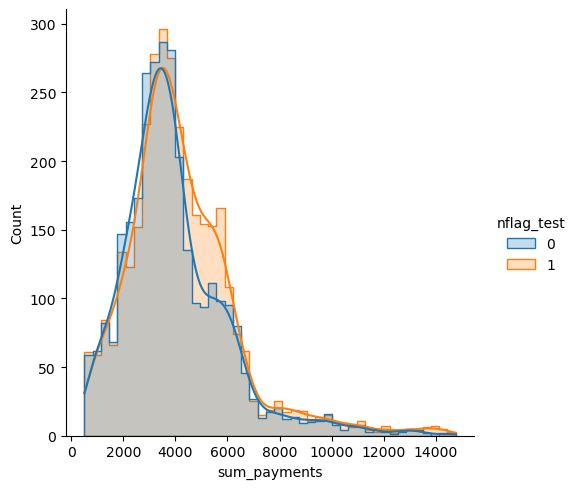

In [38]:
clientsMSC1_15000=df23 [(df23['city'].isin(['Москва']))&(df23['sum_payments']>0)&(df23['sum_payments']<15000)] #обрезаны платежи клиента (>0 и <15000)
print('Москва. Суммарные платежи каждого клиента по группам 0 и 1. ')
sns.displot(clientsMSC1_15000, x="sum_payments", hue="nflag_test", element="step",kde = True, bins = 45)
plt.show()

In [39]:
for i in df23[df23['city'].isin(['Москва'])]['city'].unique():
    print(i)
    print('T Test по сумме платежей каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['sum_payments'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['sum_payments'])
    print() 
    print('T Test по среднему платежу каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['avg_payment_ofclient'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['avg_payment_ofclient'])
    print() 
    print('T Test по конверсии в платеж каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])    
    
    print() 
    print('Mann Whitney Test по сумме платежей каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['sum_payments'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['sum_payments'])
    print() 
    print('Mann Whitney Test по среднему платежу каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['avg_payment_ofclient'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['avg_payment_ofclient'])
    print() 
    print('Mann Whitney Test по конверсии в платеж каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])
print()
print('Вывод по Москве - ТТест и Манна Уитни: ')
print('Подтвердилось неравенство рядов. Тестовая группа во всех случаях показала результат, превосходящий контрольную.')
print('Прирост среднего платежа клиента и суммарного платежа клиента составил 19%. Прирост конверсии в покупку - 11%. Pvalue всё подтверждает.')

Москва
T Test по сумме платежей каждого клиента:
Среднее первого ряда =  1986.18059125964
Среднее второго ряда =  2367.9590805347243
Рост среднего 2го ряда по отношению к 1ому =  1.192
TTest:
Значение t-критерия =  -7.6765
Значение p_value =  1.757549439555765e-14
Ряды статистически не равны

T Test по среднему платежу каждого клиента:
Среднее первого ряда =  1709.6056830701434
Среднее второго ряда =  2035.4274141397673
Рост среднего 2го ряда по отношению к 1ому =  1.191
TTest:
Значение t-критерия =  -8.7963
Значение p_value =  1.5997258768297574e-18
Ряды статистически не равны

T Test по конверсии в платеж каждого клиента:
Среднее первого ряда =  0.4879498714652956
Среднее второго ряда =  0.5435278774046299
Рост среднего 2го ряда по отношению к 1ому =  1.114
TTest:
Значение t-критерия =  -6.1903
Значение p_value =  6.194689260032594e-10
Ряды статистически не равны

Mann Whitney Test по сумме платежей каждого клиента:
Среднее первого ряда =  1986.18059125964
Среднее второго ряда =  236

СПб. Суммарные платежи каждого клиента по группам 0 и 1. 


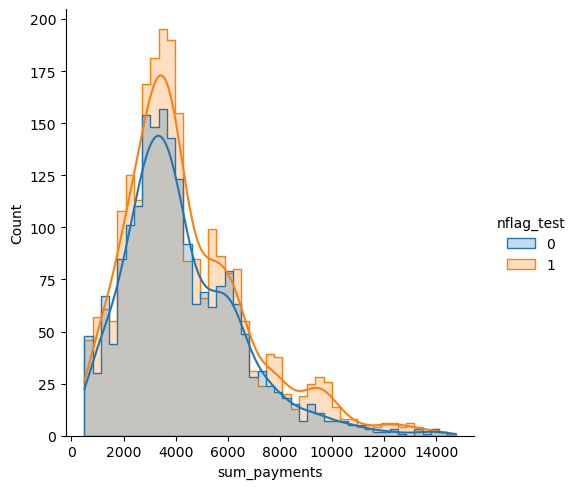

In [40]:
clientsSPb1_15000=df23 [(df23['city'].isin(['Санкт-Петербург']))&(df23['sum_payments']>0)&(df23['sum_payments']<15000)] #обрезаны платежи клиента (>0 и <15000)
print('СПб. Суммарные платежи каждого клиента по группам 0 и 1. ')
sns.displot(clientsSPb1_15000, x="sum_payments", hue="nflag_test", element="step",kde = True, bins = 45)
plt.show()

In [41]:
for i in df23[df23['city'].isin(['Санкт-Петербург'])]['city'].unique():
    print(i)
    print('T Test по суммарным платежам каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['sum_payments'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['sum_payments'])
    print() 
    print('T Test по среднему платежу каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['avg_payment_ofclient'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['avg_payment_ofclient'])
    print() 
    print('T Test по конверсии в платеж каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])    
    
    print() 
    print('Mann Whitney Test по суммарным платежам каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['sum_payments'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['sum_payments'])
    print() 
    print('Mann Whitney Test по среднему платежу каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['avg_payment_ofclient'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['avg_payment_ofclient'])
    print() 
    print('Mann Whitney Test по конверсии в платеж каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])
print() 
print('Вывод по СПб - ТТест и Манна Уитни: ')
print('Подтвердилось неравенство рядов. Тестовая группа во всех случаях показала результат, превосходящий контрольную.')
print('Прирост среднего платежа клиента - 19,6%, суммарного платежа клиента - 27%. Прирост конверсии в покупку - 22%. Pvalue всё подтверждает.')

Санкт-Петербург
T Test по суммарным платежам каждого клиента:
Среднее первого ряда =  1913.5586377988272
Среднее второго ряда =  2427.462542182227
Рост среднего 2го ряда по отношению к 1ому =  1.269
TTest:
Значение t-критерия =  -8.7596
Значение p_value =  2.3198088937974163e-18
Ряды статистически не равны

T Test по среднему платежу каждого клиента:
Среднее первого ряда =  1571.6858442339499
Среднее второго ряда =  1879.823205849269
Рост среднего 2го ряда по отношению к 1ому =  1.196
TTest:
Значение t-критерия =  -7.3327
Значение p_value =  2.452819429352378e-13
Ряды статистически не равны

T Test по конверсии в платеж каждого клиента:
Среднее первого ряда =  0.44835363103292736
Среднее второго ряда =  0.5471316085489314
Рост среднего 2го ряда по отношению к 1ому =  1.22
TTest:
Значение t-критерия =  -9.3525
Значение p_value =  1.065825659919673e-20
Ряды статистически не равны

Mann Whitney Test по суммарным платежам каждого клиента:
Среднее первого ряда =  1913.5586377988272
Среднее 

In [42]:
print('По остальным городам (кроме Мск, СПб):')
for i in df23[~df23['city'].isin(['Москва','Санкт-Петербург'])]['city'].unique():
    print() 
    print(i)
    print('T Test по суммарным платежам каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['sum_payments'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['sum_payments'])
    print() 
    print('T Test по среднему платежу каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['avg_payment_ofclient'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['avg_payment_ofclient'])
    print() 
    print('T Test по конверсии в платеж каждого клиента:')
    test_calc(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])    
    
    print() 
    print('Mann Whitney Test по суммарным платежам каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['sum_payments'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['sum_payments'])
    print() 
    print('Mann Whitney Test по среднему платежу каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['avg_payment_ofclient'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['avg_payment_ofclient'])
    print() 
    print('Mann Whitney Test по конверсии в платеж каждого клиента:')
    mann_whitney_func(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])

По остальным городам (кроме Мск, СПб):

Красноярск
T Test по суммарным платежам каждого клиента:
Среднее первого ряда =  2428.7775862068966
Среднее второго ряда =  2437.4958840961476
Рост среднего 2го ряда по отношению к 1ому =  1.004
TTest:
Значение t-критерия =  -0.12
Значение p_value =  0.9044823881233125
Ряды статистически равны

T Test по среднему платежу каждого клиента:
Среднее первого ряда =  1953.4307126436781
Среднее второго ряда =  1958.2011195258478
Рост среднего 2го ряда по отношению к 1ому =  1.002
TTest:
Значение t-критерия =  -0.0915
Значение p_value =  0.9270955794398116
Ряды статистически равны

T Test по конверсии в платеж каждого клиента:
Среднее первого ряда =  0.5613793103448276
Среднее второго ряда =  0.5577872900889035
Рост среднего 2го ряда по отношению к 1ому =  0.994
TTest:
Значение t-критерия =  0.2786
Значение p_value =  0.7805336501430107
Ряды статистически равны

Mann Whitney Test по суммарным платежам каждого клиента:
Среднее первого ряда =  2428.7775862

In [43]:
print('ВЫВОД по остальным городам - TTest и MW test.')
print('Распределения близки (без роста): Красноярск, Мурманск, Казань, Саратов, Дмитров, Краснодар (падение незначительно), Тольятти и Сахалинск (хотя всё рост, но pvalue против, видимо выборка мала). ')
print('Распределения не близки (рост): Тюмень, Самара, Владимир (рост кроме конверсии, там pvalue не подтверждает. ') 
print('Распределения не близки (падение): Волгоград (чек падение, а конверсия с 59 до 55% не является падением..), Сочи (но суммарные платежи при малом падении pvalue считает равными). ')
print('Для пограничных значений может потребоваться дополнительное исследование, учитывающее особенности городов в части количества наблюдений, возможна корректировака уровня значения alpha. ') 

ВЫВОД по остальным городам - TTest и MW test.
Распределения близки (без роста): Красноярск, Мурманск, Казань, Саратов, Дмитров, Краснодар (падение незначительно), Тольятти и Сахалинск (хотя всё рост, но pvalue против, видимо выборка мала). 
Распределения не близки (рост): Тюмень, Самара, Владимир (рост кроме конверсии, там pvalue не подтверждает. 
Распределения не близки (падение): Волгоград (чек падение, а конверсия с 59 до 55% не является падением..), Сочи (но суммарные платежи при малом падении pvalue считает равными). 
Для пограничных значений может потребоваться дополнительное исследование, учитывающее особенности городов в части количества наблюдений, возможна корректировака уровня значения alpha. 


In [44]:
# print('TTest По всем городам - сравнение конверсий:')
# for i in df23['city'].unique():
#     print(i)
#     s,p = ttest_ind(df23[(df23['city']==i)&(df23['nflag_test']==0)]['flag_pay'], df23[(df23['city']==i)&(df23['nflag_test']==1)]['flag_pay'])
#     print('t-критерий:',s,', p-value:',p)
# print('ВЫВОД. Когда p-value>5% ->ряды равны; когда меньше 5% - ряды не равны (Питер, Москва, Ярославль, Тюмень, Сочи, Самара - рост).')

In [45]:
# 7.	Отчет по АБ Тесту
# Создадим пустой датафрейм. Запустим цикл по всем городам и торговым точкам.
# Заполним для каждой торговой точки все поля, указанные в требовании к таблице.
# Не забыть задать один из трех лейблов, в зависимости от результата теста в данной торговой точке.
# Выгрузим полученные результаты в Excel. результаты разнесём по трем разным листам в зависимости от лейбла.

In [46]:
f=pd.DataFrame(columns = ['city','id_trading_point','count_control','count_test','count_all','percent_count'\
                          ,'avg_payment_control','avg_payment_test','diff','sigma_control','sigma_test','ttest','pvalue_ttest'])
for i in df23['city'].unique():
    df_loc=df23[df23['city']==i]
    
    for j in df_loc['id_trading_point'].unique():

        count_control = len(df_loc[(df_loc['nflag_test']==0)&(df_loc['id_trading_point']==j)])
        count_test = len(df_loc[(df_loc['nflag_test']==1)&(df_loc['id_trading_point']==j)])
        avg_payment_control= df_loc[(df_loc['nflag_test']==0)&(df_loc['id_trading_point']==j)]['sum_payments'].mean()
        avg_payment_test= df_loc[(df_loc['nflag_test']==1)&(df_loc['id_trading_point']==j)]['sum_payments'].mean()
        sigma_control=df_loc[(df_loc['nflag_test']==0)&(df_loc['id_trading_point']==j)]['sum_payments'].std()
        sigma_test=df_loc[(df_loc['nflag_test']==1)&(df_loc['id_trading_point']==j)]['sum_payments'].std()
        s,p = ttest_ind(df_loc[(df_loc['id_trading_point']==j)&(df_loc['nflag_test']==0)]['sum_payments'], df_loc[(df_loc['id_trading_point']==j)&(df_loc['nflag_test']==1)]['sum_payments'])
    
        f = pd.concat([f, pd.DataFrame({'city':[i]
                                            ,'id_trading_point':[j]
                                            ,'count_control':[count_control]
                                            ,'count_test':[count_test]
                                            ,'avg_payment_control':[avg_payment_control]
                                            ,'avg_payment_test':[avg_payment_test]
                                            ,'sigma_control':[sigma_control]
                                            ,'sigma_test':[sigma_test]                    
                                            ,'ttest':[s]
                                            ,'pvalue_ttest':[p]
                                               })], ignore_index = True)
    
f['count_all']=f['count_control']+f['count_test']
f['percent_count']=f['count_all']/f['count_all'].sum() #- процент кол-ва наблюдений данной ТТ от всех наблюдений
f['diff']=f['avg_payment_test']-f['avg_payment_control'] #- разница средних чеков гр1 минус гр0 (эффект от эксперимента)

conditions  = [ (f['diff']>0)&(f['pvalue_ttest']<.05), (f['diff']<=0)&(f['pvalue_ttest']<.05), f['pvalue_ttest']>=.05 ]
choices     = [ "положительный исход", 'отрицательный исход', 'нейтральный исход' ]
f['label'] = np.select(conditions, choices, default=np.nan) # Как np.where, но много вариантов исходов elif.

# final=f.merge(df3, how = 'left', left_on=['id_trading_point'], right_on=['id_trading_point']) #добавить город по ключу торговая точка (если в цикле одни ТТ).
# final = final[['city'] + [x for x in final.columns if x != 'city']] #Переместить колонку в начало датафрейма.

f

,city,id_trading_point,count_control,count_test,count_all,percent_count,avg_payment_control,avg_payment_test,diff,sigma_control,sigma_test,ttest,pvalue_ttest,label
0,Красноярск,212,575,593,1168,0.025773,2222.052174,2144.317032,-77.735142,2785.116250,2708.588724,0.483585,6.287709e-01,нейтральный исход
1,Красноярск,278,489,535,1024,0.022596,2185.214724,2499.345794,314.131070,2574.915597,2915.995329,-1.820268,6.901056e-02,нейтральный исход
2,Красноярск,202,565,551,1116,0.024626,2730.378761,2927.341198,196.962437,2737.885785,2956.686241,-1.155073,2.483083e-01,нейтральный исход
3,Красноярск,444,562,650,1212,0.026744,2545.734875,2404.106154,-141.628722,2797.138764,2810.828487,0.876740,3.808017e-01,нейтральный исход
4,Красноярск,277,709,708,1417,0.031268,2431.365303,2285.750000,-145.615303,2868.587569,2712.677878,0.981705,3.264128e-01,нейтральный исход
5,Мурманск,54,640,633,1273,0.02809,1688.512500,1702.714060,14.201560,2628.012490,2565.132440,-0.097556,9.223005e-01,нейтральный исход
6,Мурманск,55,425,422,847,0.01869,2111.272941,2109.106635,-2.166306,2804.223188,2790.993385,0.011268,9.910125e-01,нейтральный исход
7,Казань,991,294,270,564,0.012445,2452.986395,3249.281481,796.295087,3633.935858,4719.592601,-2.255258,2.450100e-02,положительный исход
8,Казань,699,494,482,976,0.021537,2574.352227,2422.286307,-152.065920,4082.851356,3906.817897,0.594254,5.524804e-01,нейтральный исход
9,Казань,477,386,382,768,0.016947,2496.987047,2259.623037,-237.364010,3881.994719,3482.846094,0.891593,3.728909e-01,нейтральный исход


In [47]:
print('Таргет-метрики: •	Конверсия из рекламы в покупку; и •	Средний чек. Комментарий: ')
print('• Конверсией в покупку считаем хотя бы одну покупку клиентом, получившим объявление. Число покупок клиентов от 0 до 11 раз. Если в расчет конверсии принимать каждую отдельную покупку, конверсия может превысить 100%. Поэтому так не делаем. ')
print('• Для среднего чека статистической единицей считаем сумму платежей каждого клиента после рекламы. За статистическую единица можно так же взять средний платеж клиента (сумма платежей клиента / количество), результаты принципиально не меняет, считается аналогично. ')

Таргет-метрики: •	Конверсия из рекламы в покупку; и •	Средний чек. Комментарий: 
• Конверсией в покупку считаем хотя бы одну покупку клиентом, получившим объявление. Число покупок клиентов от 0 до 11 раз. Если в расчет конверсии принимать каждую отдельную покупку, конверсия может превысить 100%. Поэтому так не делаем. 
• Для среднего чека статистической единицей считаем сумму платежей каждого клиента после рекламы. За статистическую единица можно так же взять средний платеж клиента (сумма платежей клиента / количество), результаты принципиально не меняет, считается аналогично. 


In [48]:
# Разбиваем по лейблу на 3 страницы для выгрузки в Элсель.
f_neutral = f[f['label'].isin(["нейтральный исход"])]
f_positive = f[f['label'].isin(["положительный исход"])]
f_negative = f[f['label'].isin(["отрицательный исход"])]


In [49]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.


In [50]:
# - Устанавливаем xlsxwriter и выгружаем результаты в Excel

writer = pd.ExcelWriter('ABTest_Analysis_DA_RESULTS.xlsx', engine='xlsxwriter')
f_neutral.to_excel(writer, sheet_name='neutral')
f_positive.to_excel(writer, sheet_name='positive')
f_negative.to_excel(writer, sheet_name='negative')
writer.close()

# в Excel делаем калькулятор, который считает экономический эффект от замены механики A на B при условии, что ей воспользуются N клиентов.
# Для нейтральных исходов предполагаем, что результаты на эти торговых точках не видны, наблюдений требуется больше. 
# Поэтому определяяем, какое количество наблюдений потребуется в каждой из торговых точек, 
# чтобы разглядеть определенную разницу в средних платежах (внешним параметром выступает MDE - сумма в рублях, 
# разница между средними платежами в группах, которая считается минимально значимой с точки зрения бизнеса.